In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

data = pd.read_csv("../dataset/bank.csv", delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [16]:
X = data.copy()
y = X.pop("y")

# Label encoding for categorical
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.integer))

mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=42)

mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores}).sort_values(by='MI Score', ascending=False)

print(mi_df.round(4)) 


      Feature  MI Score
5     balance    0.2216
11   duration    0.1812
13      pdays    0.0595
15   poutcome    0.0260
10      month    0.0207
0         age    0.0156
14   previous    0.0144
8     contact    0.0113
9         day    0.0093
1         job    0.0069
6     housing    0.0054
12   campaign    0.0051
7        loan    0.0029
2     marital    0.0021
3   education    0.0016
4     default    0.0000


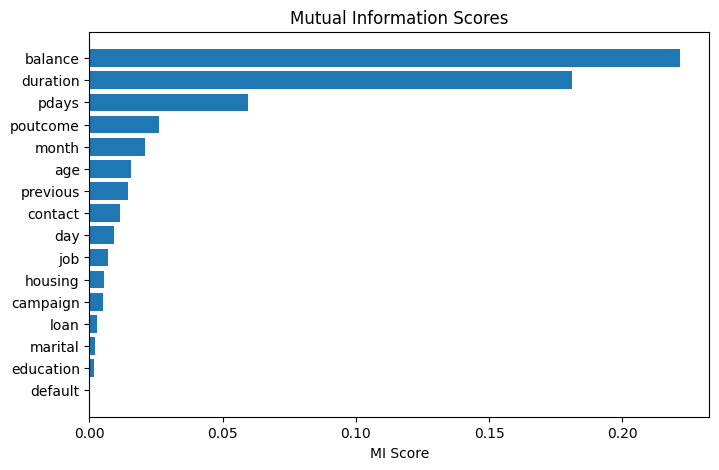

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.xlabel("MI Score")  

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_df.set_index('Feature')['MI Score'])
plt.show()  

Balance (MI Score: 0.2216): The balance feature emerged as the most informative. Clients with higher balances are likely to exhibit different subscription behavior compared to those with lower balances.

Duration (MI Score: 0.1812): The duration of the last contact was also highly informative. Longer calls often indicate a higher level of engagement or interest, making this a strong predictor.

Pdays (MI Score: 0.0757): The number of days since the client was last contacted also played an important role, reflecting the impact of recent contacts on subscription likelihood.

Poutcome (MI Score: 0.0408): The outcome of previous campaigns (poutcome) also provided predictive value, suggesting a positive outcome history is correlated with the likelihood of subscription.

Other Features: Features such as month, age, and previous campaign engagements had some, but lower, predictive power. Features such as default, education, and marital had very low MI scores, indicating limited relevance in this context.